In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle 
import pandas as pd
from datetime import date
from sklearn.cluster import KMeans

from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib import style
#rc('animation', html='html5')

from datetime import datetime

import sys
sys.path.append('./../')
from utility.eval_metric import _measure_metric,accuracy

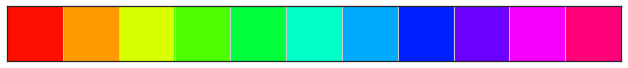

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

#current_palette = sns.color_palette(sns.hls_palette(5+1, l=.6, s=1.0))
current_palette = sns.color_palette(sns.hls_palette(10+1, l=.5, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [3]:
#saved_pickle_path = './result_pickle_aiedu2/'

# old
#saved_pickle_path = './result_pickle_scalable_exp1-2/' #reports static
#saved_pickle_path = './result_pickle_cwru_s4/' #report figure time 

# new 
# saved_pickle_path = './result_pickle_cwru_v2/' #latext table
saved_pickle_path = './result_pickle_cwru_v3/' #latext figure

format_name = '.pickle'

In [4]:
def get_together(saved_pickle_path, saved_filename1, saved_filename2, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    with open(saved_pickle_path + saved_filename2 + format_name, 'rb') as f:
        result_pickle2 = pickle.load(f) # 단 한줄씩 읽어옴       
    result_pickle = {}
    result_pickle['train_elbo'] = result_pickle1['train_elbo'] + result_pickle2['train_elbo']
    result_pickle['train_accuracy'] = result_pickle1['train_accuracy'] + result_pickle2['train_accuracy']
    result_pickle['test_elbo'] = result_pickle1['test_elbo'] + result_pickle2['test_elbo']
    result_pickle['test_accuracy'] = result_pickle1['test_accuracy'] + result_pickle2['test_accuracy']
    result_pickle['test_pred'] = result_pickle1['test_pred'] + result_pickle2['test_pred']
    result_pickle['Trained_Model'] = result_pickle1['Trained_Model'] + result_pickle2['Trained_Model']
    result_pickle['train_time'] = result_pickle1['train_time'] + result_pickle2['train_time']
    result_pickle['num_cluster_list'] = result_pickle1['num_cluster_list'] + result_pickle2['num_cluster_list']
    result_pickle['test_elbo_before'] = result_pickle1['test_elbo_before'] + result_pickle2['test_elbo_before']
    result_pickle['test_accuracy_before'] = result_pickle1['test_accuracy_before'] + result_pickle2['test_accuracy_before']
    result_pickle['Data_setting'] = result_pickle1['Data_setting']
    result_pickle['Exp_setting'] = result_pickle1['Exp_setting']
    result_pickle['HMMGP_setting'] = result_pickle1['HMMGP_setting']
    result_pickle['Exp_setting']['num_rep_exp'] = result_pickle1['Exp_setting']['num_rep_exp']  + result_pickle2['Exp_setting']['num_rep_exp'] 
    #return result_pickle1, result_pickle2
    return result_pickle

In [5]:
import glob

In [6]:
def get_result(saved_pickle_path, saved_filename1, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1

def load_pickle(pickle_filepath):
    with open(pickle_filepath, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1
    

In [7]:
filenamelist = glob.glob(saved_pickle_path + '*' + format_name)

In [8]:
target_filenamelist = []
target_filenamelist2 = []
for ith_filelist in filenamelist:
    if ith_filelist.split('/')[-1].split('_')[-1][:9] == 'numhidden': 
        #print(ith_filelist.split('_')[6])
        #if ith_filelist.split('_')[5] == 'emissiongpsm': #aidedu2
        if ith_filelist.split('_')[6] == 'emissiongpsm':  #scalable1-2          
            target_filenamelist.append(ith_filelist)
        else:
            target_filenamelist2.append(ith_filelist)
            
        #print(ith_filelist)

In [10]:
target_filenamelist2 += target_filenamelist

In [15]:
def get_results(target_target_filenamelist):
    digit = 2
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden,numrepexp = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState'],loaded_pickle['Exp_setting']['num_rep_exp']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)
        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
                             'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(digit),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(digit)
                #static[ith_key] = (mean[0],std[0],mean[-1],std[-1])      
                if ith_key in ['train_accuracy_list', 'test_accuracy_list']:
                    static[ith_key] = (mean[0],(std[0]/np.sqrt(numrepexp)).round(digit),mean[-1],(std[-1]/np.sqrt(numrepexp)).round(digit))      

                else:
#                     if ith_key in ['tr_lik_list','etr_lik_list']:
#                         numdat=100*1000
#                         static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))     
#                     elif ith_key in ['te_lik_list', 'ete_lik_list']:
#                         numdat=50*1000
#                         static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))     
#                     else:
#                         static[ith_key] = (mean[-1].round(3),(std[-1]/np.sqrt(numrepexp)).round(3))      

                    if ith_key in ['tr_lik_list','etr_lik_list']:
                        numdat=120*8000
                        static[ith_key] = ((mean[-1]/numdat).round(digit),(std[-1]/(numdat*np.sqrt(numrepexp))).round(digit))     
                    elif ith_key in ['te_lik_list', 'ete_lik_list']:
                        numdat=120*8000
                        static[ith_key] = ((mean[-1]/numdat).round(digit),(std[-1]/(numdat*np.sqrt(numrepexp))).round(digit))     
                    else:
                        static[ith_key] = (mean[-1].round(digit),(std[-1]/np.sqrt(numrepexp)).round(digit))      

            results[modeldescription] = static
        except:
            pass
    return results










def get_drawresults(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)

        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
                             'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
#         static = {}        
#         for ith_key in target_eval_list:
#             mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
#             if ith_key in ['train_time']:
#                 print(np.cumsum(mean))
#                 static[ith_key] = (np.cumsum(mean))      
#             else:
#                 static[ith_key] = (mean,std)    

#         results[modeldescription] = static
        
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                if ith_key in ['train_time']:
                    static[ith_key] = (np.cumsum(mean))      
                else:
                    static[ith_key] = (mean,std)    
                
            results[modeldescription] = static
        except:
            pass
        
        
    return results

In [16]:
import copy 
from collections import OrderedDict

#target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']

def filter_results(results_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    print('#'*200)
    print('#'*200)    
    #tmp_dict = OrderedDict()
    tmp_dict = {}
    #ordered_result = OrderedDict()
    for ith_key in results_dict:
        if ith_key[0] == numhidden and ith_key[3]==numQ:
#             print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))
#             for iith_key in target_eval_list:            
#                 print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
#                 #print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
#             print('\n')
            if ith_key[1] == 'GPSM':
                tmp_dict[int(ith_key[-2])] = ith_key
            else:                
                tmp_dict[int(ith_key[-1])] = ith_key
    
    #sorted_dict = sorted(tmp_dict.items())
    #print(sorted_dict )
    for ith in sorted(tmp_dict.items()):
        #print(ith)
        ith_key = ith[1]        
        print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))        
        for iith_key in target_eval_list:            
            #print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
            print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
        print('')
    return 
  
    
    
def filter_results_draw(result_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    result_dict_cp = copy.deepcopy(result_dict)
    for ith_key in result_dict_cp :
        if ith_key[0] == numhidden and ith_key[3]==numQ:
            pass
        else:
            result_dict_cp[ith_key] = None
            
    return result_dict_cp 

## exp2

In [17]:
#target_eval_list = [ 'te_lik_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
#target_eval_list = [ 'test_accuracy_list', 'te_lik_list',  'bic_list','train_time','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
#target_eval_list = [ 'test_accuracy_list', 'te_lik_list',  'bic_list','train_time','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']

target_eval_list = [ 'test_accuracy_list', 'etest_accuracy_list','te_lik_list', 'ete_lik_list','train_time' ]


results = get_results(target_filenamelist2)
# filter_results(results,numhidden=4,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=6,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=10,numQ=4,target_eval_list=target_eval_list)

# filter_results(results,numhidden=3,numQ=6,target_eval_list=target_eval_list)
# filter_results(results,numhidden=3,numQ=8,target_eval_list=target_eval_list)

filter_results(results,numhidden=3,numQ=8,target_eval_list=target_eval_list)
filter_results(results,numhidden=4,numQ=8,target_eval_list=target_eval_list)
filter_results(results,numhidden=5,numQ=8,target_eval_list=target_eval_list)


# filter_results(results,numhidden=3,numQ=6,target_eval_list=target_eval_list)
# filter_results(results,numhidden=4,numQ=6,target_eval_list=target_eval_list)
# filter_results(results,numhidden=5,numQ=6,target_eval_list=target_eval_list)


########################################################################################################################################################################################################
########################################################################################################################################################################################################
########################################################################################################################################################################################################
########################################################################################################################################################################################################
####################################################################################################################################################################################################

In [18]:
# 439504.925/50000,170816.133/50000,301523.512/50000

In [19]:
# filter_results(results,numhidden=4,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=6,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=10,numQ=5,target_eval_list=target_eval_list)

## drawfigures

In [20]:
target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
results_draw = get_drawresults(target_filenamelist2)
target_result = filter_results_draw(results_draw,numhidden=8,numQ=6,target_eval_list=target_eval_list)
target_result = filter_results_draw(results_draw,numhidden=4,numQ=8,target_eval_list=target_eval_list)


No handles with labels found to put in legend.


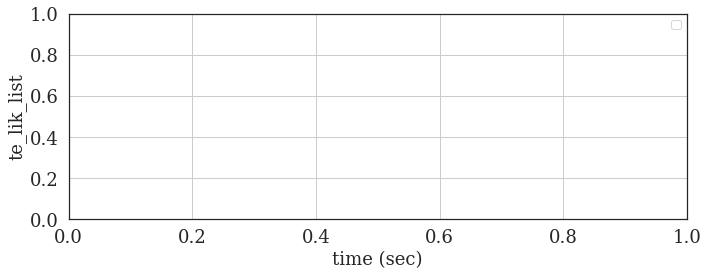

No handles with labels found to put in legend.


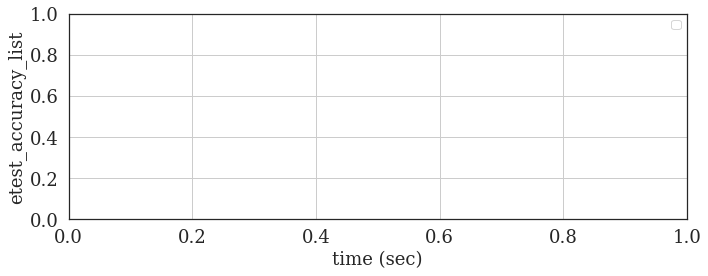

In [21]:
#target_result = filter_results_draw(results_draw ,numhidden=10,numQ=5,target_eval_list=target_eval_list)
#draw_static = 'te_elbo_list'
#draw_static = 'te_lik_list'
draw_static = 'te_lik_list'

#draw_static = 'test_accuracy_list'


figsiz=(10,4)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith_key in target_result:
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 



plt.minorticks_off()
#plt.xscale('log',basex=2) 
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)


plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)

#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = 12)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




draw_static = 'etest_accuracy_list'
#draw_static = 'test_accuracy_list'

figsiz=(10,4)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith_key in target_result:
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 


        
#plt.xscale('log',basex=2) 
#plt.xticks([2**10,2**11,2**12,2**13,2**14,2**15],fontsize =  18)
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)

plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)
plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = 12)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

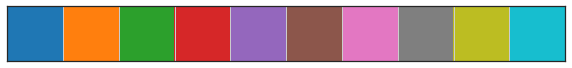

In [22]:
#current_palette = sns.color_palette(sns.hls_palette(7+1, l=.5, s=1.0))
current_palette = sns.color_palette('tab10')
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [23]:
#current_palette[[0,2,3]]

In [24]:
current_palette = current_palette[[0,2,3]]

In [25]:
#label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
def _transform_dict2name(ith_key):
    print(ith_key)
    if ith_key[1] == 'gpsm' and ith_key[2] == 'SVI': 
        return 'SVI-SM L={},Q={}'.format(ith_key[-2],ith_key[3])
    elif ith_key[1] == 'gpsm' and ith_key[2] != 'SVI': 
        return 'VI-SM T={},Q={}'.format(ith_key[-2],ith_key[3])
    
    elif ith_key[1] == 'gprrff_beta' and ith_key[2] == 'SVI':
        return 'SVI-SM-RF L={},Q={},R={}'.format(ith_key[-2],ith_key[3],ith_key[-1]/8000)
    else:
        pass
    #(8, 'gpsm', 'SVI', 3, 100, 10, 1000)

In [26]:
xlim_ = [0-10,350+10]
fontsiz_ = 18

No handles with labels found to put in legend.


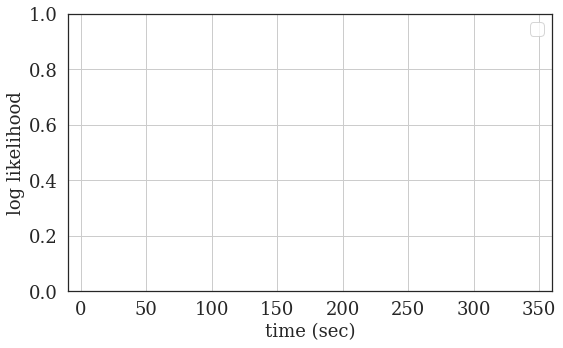

No handles with labels found to put in legend.


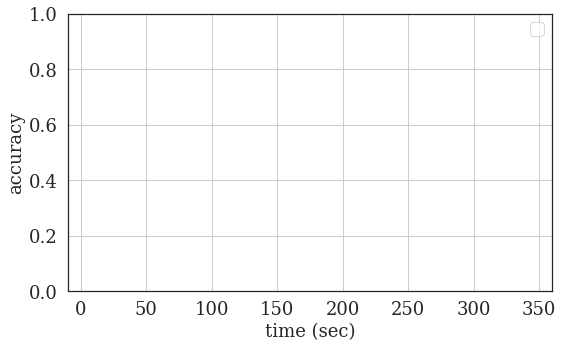

In [27]:
#target_result = filter_results_draw(results_draw ,numhidden=10,numQ=5,target_eval_list=target_eval_list)
#draw_static = 'te_elbo_list'
#draw_static = 'tr_lik_list'
draw_static = 'te_lik_list'

#draw_static = 'test_accuracy_list'


figsiz=(8,5)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith,ith_key in enumerate(target_result):
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)
        
        
        print(ith_key,_transform_dict2name(ith_key))
        plt.plot(iteration ,mean , linewidth = 3.0 ,label =  _transform_dict2name(ith_key) ,color = current_palette[ith]  ,marker = 's',markersize=5 )
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 



plt.minorticks_off()
#plt.xscale('log',basex=2) 

#plt.xscale('log',basex=2) 
plt.xticks(fontsize =  fontsiz_)
plt.yticks(fontsize = fontsiz_)
plt.xlim(xlim_)

plt.xlabel('time (sec)',fontsize = fontsiz_)
#plt.ylabel(draw_static,fontsize =  18)
plt.ylabel('log likelihood',fontsize =  fontsiz_)

#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize =fontsiz_-1)

fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.savefig('./test_lik'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')

plt.show()













#draw_static = 'etrain_accuracy_list'
draw_static = 'etest_accuracy_list'
#draw_static = 'test_accuracy_list'

#figsiz=(7,4.5)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
for ith,ith_key in enumerate(target_result):
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0  ,label =  _transform_dict2name(ith_key) ,color = current_palette[ith] ,marker = 's',markersize=5 )
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith]) 


        
#plt.xscale('log',basex=2) 
#plt.xticks([2**10,2**11,2**12,2**13,2**14,2**15],fontsize =  18)
plt.xticks(fontsize =  fontsiz_)
plt.yticks(fontsize = fontsiz_)

plt.xlim(xlim_)

plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = fontsiz_)
#plt.ylabel(draw_static,fontsize =  18)
plt.ylabel('accuracy',fontsize =  fontsiz_)

#plt.yticks(fontsize = 18)
#plt.legend(loc='lower right',fontsize = 15)
#plt.legend(loc='upper left',fontsize = 12)
plt.legend(loc='best',fontsize = fontsiz_-1)

fig.tight_layout()    
plt.savefig('./test_acc'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')

#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

In [28]:
save_format='.pickle'
with open('./../cwru_v1' + save_format, 'rb') as f:
    cwru_datdict_l = pickle.load(f) # 단 한줄씩 읽어옴
x_train,y_train,z_train,x_test,y_test,z_test = cwru_datdict_l['dataset']
file_name = cwru_datdict_l['file_name']
print('loaed datset at {}'.format('./cwru_v1' + save_format))


FileNotFoundError: [Errno 2] No such file or directory: './../cwru_v1.pickle'

In [109]:
idx = np.array([15, 12, 20])

In [110]:
fontsiz=15
ylim_ =[-5,5]
xlim_=[2000,4000]

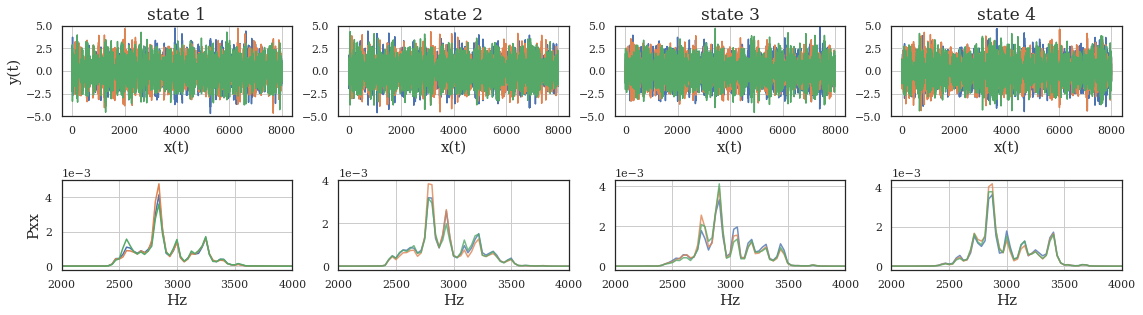

In [111]:
import scipy.signal as signal


figure=plt.figure(figsize=(19,4.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.20, hspace=.7)
plt.subplot(2,4,1)
plt.plot(y_train[z_train==0][idx ].T)
#plt.plot(y_train[z_train==1][idx ].T)

plt.ylabel('y(t)',fontsize=fontsiz)
plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 1',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.subplot(2,4,2)
plt.plot(y_train[z_train==1][idx ].T)
#plt.plot(y_train[z_train==2][idx ].T)

plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 2',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.subplot(2,4,3)
plt.plot(y_train[z_train==2][idx ].T)
#plt.plot(y_train[z_train==3][idx ].T)

plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 3',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.subplot(2,4,4)
plt.plot(y_train[z_train==3][idx ].T)
#plt.plot(y_train[z_train==4][idx ].T)

plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 4',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))





plt.subplot(2,4,5)
fs,pss = signal.welch(y_train[z_train==0][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==1][idx],fs=8000)

plt.plot(fs,pss.T)
plt.xlim(xlim_)
plt.xlabel('Hz',fontsize=fontsiz)
plt.ylabel('Pxx',fontsize=fontsiz)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))


plt.subplot(2,4,6)
fs,pss = signal.welch(y_train[z_train==1][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==2][idx],fs=8000)

plt.plot(fs,pss.T,alpha=0.8)
plt.xlim(xlim_)
plt.xlabel('Hz',fontsize=fontsiz)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

#plt.ylabel('Pxx',fontsize=fontsiz)

plt.subplot(2,4,7)
fs,pss = signal.welch(y_train[z_train==2][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==3][idx],fs=8000)

plt.plot(fs,pss.T,alpha=0.8)
plt.xlim(xlim_)
plt.xlabel('Hz',fontsize=fontsiz)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

#plt.ylabel('Pxx',fontsize=fontsiz)

plt.subplot(2,4,8)
fs,pss = signal.welch(y_train[z_train==3][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==4][idx],fs=8000)

plt.plot(fs,pss.T,alpha=0.8)
plt.xlim(xlim_)
plt.xlabel('Hz',fontsize=fontsiz)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

#plt.ylabel('Pxx',fontsize=fontsiz)

plt.savefig('./cwru' + '.pdf'  , format='pdf', dpi=1000, bbox_inches='tight')


#plt.

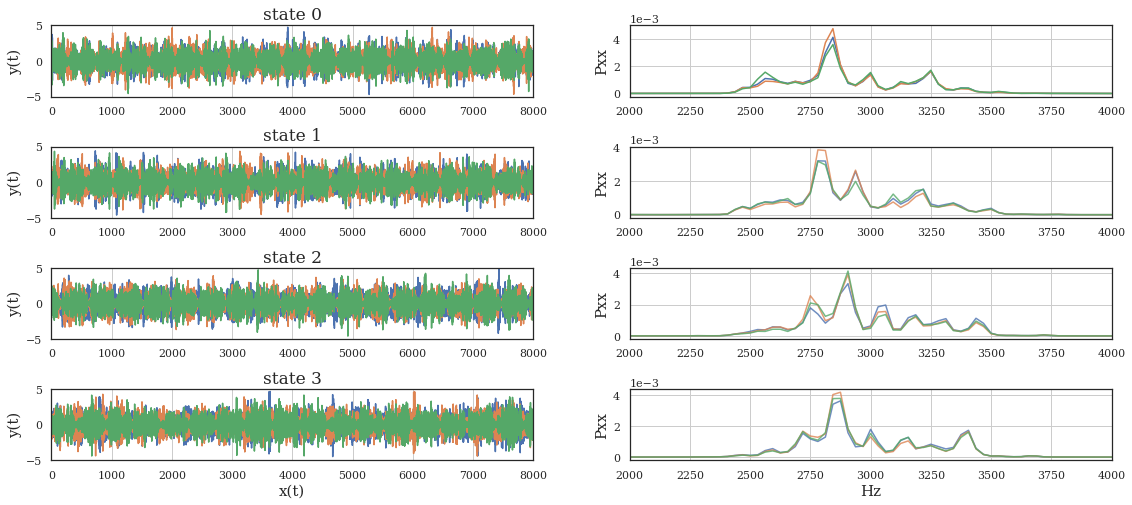

In [112]:
import scipy.signal as signal


xlim__ = [0,8000] 

figure=plt.figure(figsize=(19,2*4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.20, hspace=.7)
plt.subplot(4,2,1)
plt.plot(y_train[z_train==0][idx ].T)
#plt.plot(y_train[z_train==1][idx ].T)

plt.ylabel('y(t)',fontsize=fontsiz)
#plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 0',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.xlim(xlim__)



plt.subplot(4,2,3)
plt.plot(y_train[z_train==1][idx ].T)
#plt.plot(y_train[z_train==2][idx ].T)
plt.ylabel('y(t)',fontsize=fontsiz)

#plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 1',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.xlim(xlim__)



plt.subplot(4,2,5)
plt.plot(y_train[z_train==2][idx ].T)
#plt.plot(y_train[z_train==3][idx ].T)

#plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 2',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('y(t)',fontsize=fontsiz)
plt.xlim(xlim__)



plt.subplot(4,2,7)
plt.plot(y_train[z_train==3][idx ].T)
#plt.plot(y_train[z_train==4][idx ].T)

#plt.xlabel('x(t)',fontsize=fontsiz)
plt.ylim(ylim_)
plt.title('state 3',fontsize=17)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('y(t)',fontsize=fontsiz)
plt.xlabel('x(t)',fontsize=fontsiz)
plt.xlim(xlim__)





plt.subplot(4,2,2)
fs,pss = signal.welch(y_train[z_train==0][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==1][idx],fs=8000)

plt.plot(fs,pss.T)
plt.xlim(xlim_)
#plt.xlabel('Hz',fontsize=fontsiz)
plt.ylabel('Pxx',fontsize=fontsiz)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))


plt.subplot(4,2,4)
fs,pss = signal.welch(y_train[z_train==1][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==2][idx],fs=8000)

plt.plot(fs,pss.T,alpha=0.8)
plt.xlim(xlim_)
#plt.xlabel('Hz',fontsize=fontsiz)
plt.ylabel('Pxx',fontsize=fontsiz)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

#plt.ylabel('Pxx',fontsize=fontsiz)

plt.subplot(4,2,6)
fs,pss = signal.welch(y_train[z_train==2][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==3][idx],fs=8000)

plt.plot(fs,pss.T,alpha=0.8)
plt.xlim(xlim_)
#plt.xlabel('Hz',fontsize=fontsiz)
plt.ylabel('Pxx',fontsize=fontsiz)

plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

#plt.ylabel('Pxx',fontsize=fontsiz)

plt.subplot(4,2,8)
fs,pss = signal.welch(y_train[z_train==3][idx],fs=8000)
#fs,pss = signal.welch(y_train[z_train==4][idx],fs=8000)

plt.plot(fs,pss.T,alpha=0.8)
plt.xlim(xlim_)
plt.xlabel('Hz',fontsize=fontsiz)
plt.ylabel('Pxx',fontsize=fontsiz)

plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

#plt.ylabel('Pxx',fontsize=fontsiz)
plt.savefig('./cwru_v2' + '.pdf'  , format='pdf', dpi=1000, bbox_inches='tight')


#plt.

In [113]:
# z_train += 1 
# z_test += 1 

In [147]:
index=0
target_filenamelist2[index].split('/')[-1]

'dataB_028_0123_fulllen120_emissiongprrff_beta_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numitertrain100_numiterhyp10_iterhyplr0.001_numQ8_numspectralpttotal80_numbatchrrff1_repetitiveexp3_numinititeration501_numhidden4.pickle'

In [148]:
load_pickle(target_filenamelist2[index])['test_accuracy_list']

[array([0.79166667, 0.825     , 0.825     , 0.79166667, 0.78333333,
        0.79166667, 0.775     , 0.825     , 0.80833333, 0.8       ,
        0.83333333, 0.83333333, 0.84166667, 0.79166667, 0.80833333,
        0.84166667, 0.825     , 0.84166667, 0.81666667, 0.90833333,
        0.89166667, 0.89166667, 0.85833333, 0.85      , 0.89166667,
        0.84166667, 0.9       , 0.89166667, 0.90833333, 0.84166667,
        0.825     , 0.84166667, 0.81666667, 0.76666667, 0.775     ,
        0.78333333, 0.79166667, 0.825     , 0.83333333, 0.825     ,
        0.88333333, 0.825     , 0.84166667, 0.85833333, 0.86666667,
        0.83333333, 0.90833333, 0.89166667, 0.825     , 0.89166667,
        0.90833333, 0.9       , 0.88333333, 0.91666667, 0.89166667,
        0.88333333, 0.9       , 0.9       , 0.9       , 0.875     ,
        0.89166667, 0.9       , 0.88333333, 0.86666667, 0.925     ,
        0.89166667, 0.88333333, 0.90833333, 0.9       , 0.91666667,
        0.9       , 0.9       , 0.84166667, 0.91

In [149]:
pred = load_pickle(target_filenamelist2[index])['pred_list'][0].squeeze()
#(z_train_pred_e,z_test_pred_e,z_train_pred,z_test_pred) = pred[0], pred[1], pred[2], pred[3]
(z_train_pred_e,z_test_pred_e,z_train_pred,z_test_pred) = pred[-1,0,:], pred[-1,1,:] , pred[-1,0,:] ,pred[-1,1,:] 

In [150]:
#pred[-1,1,:]

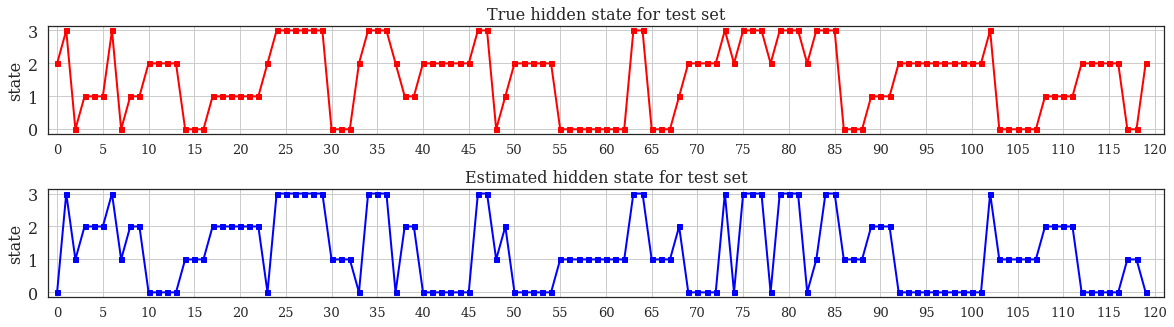

In [151]:
# plt.figure(figsize=(16,3))
# #plt.plot((z_train.reshape(-1,1)*np.ones((1,8000))).reshape(1,-1))
# plt.plot(z_train,'r.')
# plt.plot(z_train_pred,'b.')
# #plt.xticks(np.arange(120))
# plt.yticks([1,2,3,4])
#plt.show()

fontsiz_=16

xlim_=[0-1,120+1]
plt.figure(figsize=(20,2.5*2))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.5)


#plt.plot((z_train.reshape(-1,1)*np.ones((1,8000))).reshape(1,-1))
plt.subplot(2,1,1)
plt.plot(z_test,'rs',markersize=5,color='red')
plt.plot(z_test,'r-',linewidth=2,color='red')

plt.xticks(np.arange(121)[::5],fontsize=fontsiz_-3)
plt.xlim(xlim_)
#plt.yticks([1,2,3,4],fontsize=fontsiz_)
plt.yticks([0,1,2,3],fontsize=fontsiz_)

plt.ylabel('state',fontsize=fontsiz_)
plt.title('True hidden state for test set',fontsize=fontsiz_)


plt.subplot(2,1,2)
plt.plot(z_test_pred,'bs',markersize=5,color='blue')
plt.plot(z_test_pred,'b-',linewidth=2,color='blue')

plt.xticks(np.arange(121)[::5],fontsize=fontsiz_-3)
plt.xlim(xlim_)
#plt.yticks([1,2,3,4],fontsize=fontsiz_)
plt.yticks([0,1,2,3],fontsize=fontsiz_)

plt.ylabel('state',fontsize=fontsiz_)
plt.title('Estimated hidden state for test set',fontsize=fontsiz_)
#plt.xticks(np.arange(120))

#plt.savefig('./estimation_total' + '.pdf'  , format='pdf', dpi=1000, bbox_inches='tight')

plt.show()


In [152]:
colorlist=['red','blue','green','orange']
xlim_ = [30,41+1] 

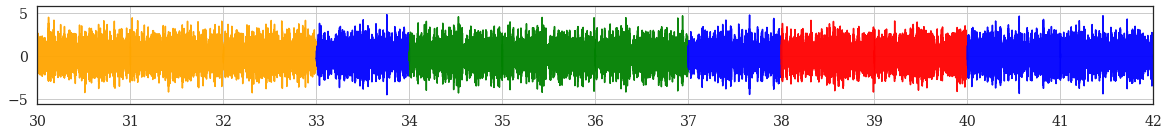

In [153]:
figure=plt.figure(figsize=(20,1.8))
#for ith,(ith_xtr,ith_ytr,ith_ztr) in enumerate(zip(x_train,y_train,z_train)):
for ith,(ith_xtr,ith_ytr,ith_ztr) in enumerate(zip(x_test,y_test,z_test)):    
    plt.plot(ith+ith_xtr,ith_ytr,color=colorlist[ith_ztr-1],alpha=0.95)
plt.xticks(np.arange(120),fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(xlim_ )
#plt.savefig('./true_hidden_cwru' + '.pdf'  , format='pdf', dpi=1000, bbox_inches='tight')

plt.show()
#x_train

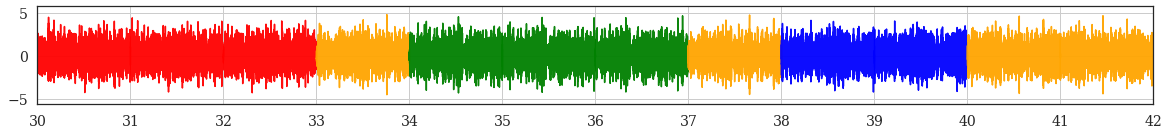

In [154]:
figure=plt.figure(figsize=(20,1.8))
#for ith,(ith_xtr,ith_ytr,ith_ztr) in enumerate(zip(x_train,y_train,z_train)):
for ith,(ith_xtr,ith_ytr,ith_ztr) in enumerate(zip(x_test,y_test,z_test_pred)):    
    plt.plot(ith+ith_xtr,ith_ytr,color=colorlist[ith_ztr-1],alpha=0.95)
plt.xticks(np.arange(120),fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(xlim_ )
#plt.savefig('./estimate_hidden_cwru' + '.pdf'  , format='pdf', dpi=1000, bbox_inches='tight')

plt.show()
#x_train

## parameters analysis

In [155]:
#len()
load_pickle(target_filenamelist2[index])['paramhistory_dict'][1]['var_A'][-1]

array([[ 9.75917666,  1.63700686,  3.54534596,  5.374039  ],
       [ 1.43957054, 20.96151386,  5.99245287,  5.63457798],
       [ 6.04440931,  1.87391061, 12.30992531,  2.79810014],
       [ 2.28913926, 10.02475193,  1.62087329, 24.59520415]])

In [156]:
var_A_alpha,var_pi_alpha = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['var_A'][-1],load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['var_pi'][-1]
var_A_alpha/var_A_alpha.sum(axis=1,keepdims=True),var_pi_alpha/var_pi_alpha.sum(axis=1,keepdims=True)




(array([[0.52254123, 0.12245727, 0.2153841 , 0.1396174 ],
        [0.04096237, 0.7212163 , 0.10801013, 0.12981121],
        [0.11422838, 0.1336633 , 0.61832738, 0.13378093],
        [0.12421043, 0.3128521 , 0.05673335, 0.50620412]]),
 array([[0.27932272, 0.27505805, 0.21443416, 0.23118507]]))

In [157]:
# 0 index for model
# 0 -> 1
# 1 -> 2 
# 2 -> 0

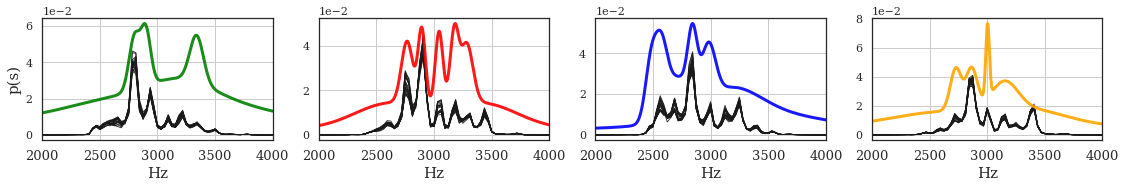

In [158]:


# mu0 = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['mu'][0]
# std0 = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['std'][0]
# weight0 = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['std'][0]

# mu_ = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['mu'][-1]
# std_ = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['std'][-1]
# weight_ = load_pickle(target_filenamelist2[index])['paramhistory_dict'][0]['std'][-1]

# #xlim_range = [0-1,512]
# from scipy import signal
# from scipy import  stats

# colorlist=['red','blue','green','orange']
# xlim_=[2000,4000]


# #from utility.eval_metric import _measure_metric,accuracy
# revised_order_dict, revised_z_test_pred, _ = _measure_metric(z_test, z_test_pred)




# figure=plt.figure(figsize=(19,2.25))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.20, hspace=.7)
# x = np.arange(4000)
# for ith_emission in range(4):
#     plt.subplot(1,4,ith_emission+1)
    
    
    
        
# #     if ith_emission in [1,3]:
# #         if ith_emission == 1:
# #             ith_remission = 3
# #         else:
# #             ith_remission = 1
#     if ith_emission in [0,1,2]:
#         if ith_emission == 0:
#             ith_remission = 1
#         elif ith_emission == 1:
#             ith_remission = 2            
#         elif ith_emission == 2:
#             ith_remission = 0                        
#         else:
#             ith_remission = 1

#     else:
#         ith_remission = ith_emission
    
#     fs,pss = signal.welch(y_test[z_test==ith_remission][:20],fs=8000)
#     plt.plot(fs, 10*pss.T,'k'  ,alpha = .9 , linewidth = 0.9)        
#     #plt.plot(fs, np.log(pss.T),'k'  ,alpha = .9 , linewidth = 0.9)        
        

        
        
#     a = 0
#     rith_emission = revised_order_dict[ith_emission]    
#     #for ith_weight,ith_mu,ith_std in zip(weight0[rith_emission],mu0[rith_emission],std0[rith_emission]) :
#     for ith_weight,ith_mu,ith_std in zip(weight_[rith_emission],mu_[rith_emission],std_[rith_emission]) :
        
#         a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))
        
#     plt.plot(x, a  ,color = colorlist[rith_emission] , linewidth = 3.0 ,alpha = .9  )        
#     #plt.plot(x, np.log(a)  ,color = colorlist[rith_emission] ,linewidth = 3.0 ,alpha = .9   )        
        
        
        
        
        
        
        
#     if ith_emission == 0:
#          plt.ylabel('p(s)',fontsize = 15)
            
#     plt.xlabel('Hz',fontsize = 15)
   
#     plt.xticks(fontsize = 13)
#     plt.xlim(xlim_)
#     plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))



# fig.tight_layout()    
# plt.savefig( 'psd_analysis'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()























In [159]:
# import scipy.signal as signal


# figure=plt.figure(figsize=(19,4.5))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.20, hspace=.7)
# plt.subplot(3,4,1)
# plt.plot(y_train[z_train==0][idx ].T)
# #plt.plot(y_train[z_train==1][idx ].T)

# plt.ylabel('y(t)',fontsize=fontsiz)
# plt.xlabel('x(t)',fontsize=fontsiz)
# plt.ylim(ylim_)
# plt.title('state 1',fontsize=17)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# plt.subplot(3,4,2)
# plt.plot(y_train[z_train==1][idx ].T)
# #plt.plot(y_train[z_train==2][idx ].T)

# plt.xlabel('x(t)',fontsize=fontsiz)
# plt.ylim(ylim_)
# plt.title('state 2',fontsize=17)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# plt.subplot(3,4,3)
# plt.plot(y_train[z_train==2][idx ].T)
# #plt.plot(y_train[z_train==3][idx ].T)

# plt.xlabel('x(t)',fontsize=fontsiz)
# plt.ylim(ylim_)
# plt.title('state 3',fontsize=17)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# plt.subplot(3,4,4)
# plt.plot(y_train[z_train==3][idx ].T)
# #plt.plot(y_train[z_train==4][idx ].T)

# plt.xlabel('x(t)',fontsize=fontsiz)
# plt.ylim(ylim_)
# plt.title('state 4',fontsize=17)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))





# plt.subplot(3,4,5)
# fs,pss = signal.welch(y_train[z_train==0][idx],fs=8000)
# #fs,pss = signal.welch(y_train[z_train==1][idx],fs=8000)

# plt.plot(fs,pss.T)
# plt.xlim(xlim_)
# plt.xlabel('Hz',fontsize=fontsiz)
# plt.ylabel('Pxx',fontsize=fontsiz)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))


# plt.subplot(3,4,6)
# fs,pss = signal.welch(y_train[z_train==1][idx],fs=8000)
# #fs,pss = signal.welch(y_train[z_train==2][idx],fs=8000)

# plt.plot(fs,pss.T,alpha=0.8)
# plt.xlim(xlim_)
# plt.xlabel('Hz',fontsize=fontsiz)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# #plt.ylabel('Pxx',fontsize=fontsiz)

# plt.subplot(3,4,7)
# fs,pss = signal.welch(y_train[z_train==2][idx],fs=8000)
# #fs,pss = signal.welch(y_train[z_train==3][idx],fs=8000)

# plt.plot(fs,pss.T,alpha=0.8)
# plt.xlim(xlim_)
# plt.xlabel('Hz',fontsize=fontsiz)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# #plt.ylabel('Pxx',fontsize=fontsiz)

# plt.subplot(3,4,8)
# fs,pss = signal.welch(y_train[z_train==3][idx],fs=8000)
# #fs,pss = signal.welch(y_train[z_train==4][idx],fs=8000)

# plt.plot(fs,pss.T,alpha=0.8)
# plt.xlim(xlim_)
# plt.xlabel('Hz',fontsize=fontsiz)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# #plt.ylabel('Pxx',fontsize=fontsiz)






















# #plt.savefig('./cwru' + '.pdf'  , format='pdf', dpi=1000, bbox_inches='tight')


# #plt.